In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
np.random.seed(42)

# Function to generate the dataset for linear regression
def generate_linear_regression_dataset(n_samples, n_features, noise_std):
    # Draw covariates from a Gaussian distribution
    X = np.random.normal(0, 1, (n_samples, n_features))

    # Define the true parameter vector 𝜃* (all ones)
    theta_star = np.ones(n_features)

    # Draw noise from a Gaussian distribution
    noise = np.random.normal(0, noise_std, n_samples)

    # Compute the response variable Y
    Y = X @ theta_star + noise

    return X, Y

# Gradient of the squared error loss function for linear regression
def gradient_squared_error_loss(theta, X, Y):
    if X.ndim == 1:
        X = X.reshape(1, -1)
    return -X.T @ (Y - X @ theta)

# Generate weights from a uniform distribution
def generate_weights(n_samples, gamma, sigma):
    p = np.random.uniform(size=n_samples)
    #p = np.random.binomial(n=1, p=0.5, size=n_samples)
    
    def weight_form(alpha):
        return (p**alpha)/(p**alpha + (1-p)**alpha)**(1/alpha)
    
    #gamma = 0.3
    #sigma = 0.1
    w = weight_form(gamma) + weight_form(sigma)
    return w

# Update the model parameters 𝜃 using the given update rule
def update_theta(theta, X, Y, learning_rate, flag, gamma=0.5, sigma=0.5):
    n_samples = X.shape[0]
    
    if flag==0:
        weights = np.ones(n_samples)
    else:
        weights = generate_weights(n_samples, gamma, sigma)
        #print(weights.mean())
    weighted_gradients = np.zeros_like(theta)
    
    for i in range(n_samples):
        gradient = gradient_squared_error_loss(theta, X[i], Y[i])
        weighted_gradients += weights[i] * gradient
        
    theta_next = theta - learning_rate / n_samples * weighted_gradients
    return theta_next

# Mean Squared error loss function for linear regression
def ERM_loss(theta, X, Y):
    n_samples = X.shape[0]
    return 0.5 * np.sum((Y - X @ theta)**2) / n_samples

# Mean Squared error loss function for linear regression
def HRM_loss(theta, X, Y, gamma, sigma):
    n_samples = X.shape[0]
    weights = generate_weights(n_samples, gamma, sigma)
    return 0.5 * np.sum(weights * (Y - X @ theta)**2) / n_samples

# Iterative optimization procedure for the empirical minimizer of different L-Risks
def optimize_theta(X, Y, learning_rate, n_iterations, flag=0, gamma=0.5, sigma=0.5):
    n_features = X.shape[1]
    theta = np.zeros(n_features)
    loss_history = []
    n_samples = X.shape[0]

    for t in range(n_iterations):
        theta = update_theta(theta, X, Y, learning_rate, flag, gamma, sigma)

        if flag == 0:
            loss = ERM_loss(theta, X, Y)
        else:
            loss = HRM_loss(theta, X, Y, gamma, sigma)

        loss_history.append(loss)

    return theta, loss_history

# Generate the entire dataset
n_samples = 20000
n_features = 5
noise_std = 0.1
X, Y = generate_linear_regression_dataset(n_samples, n_features, noise_std)

# Parameters for the optimization
learning_rate = 0.1
n_iterations = 200

# # Example: optimize 𝜃 using uniform weights (flag=0)
# theta_optimized_uniform, loss_history_uniform_0 = optimize_theta(X, Y, learning_rate, n_iterations, flag=1)

# # Print the optimized 𝜃 and the loss history
# print(f"Optimized 𝜃: {theta_optimized_uniform}")
# print(f"Loss history: {loss_history_uniform}")

# Example: optimize 𝜃 using uniform weights
# uniform_weights = np.ones(X.shape[0])
# theta_optimized_uniform = optimize_theta(X, Y, learning_rate, n_iterations, flag=1)

# # Calculate the true L-Risk for the optimized 𝜃
# Y_pred = np.matmul(X, theta_optimized_uniform)
# true_l_risk_optimized = 0.5 * np.sum((Y - Y_pred)**2) / n_samples

# # Print the optimized 𝜃 and the true L-Risk
# print(f"Optimized 𝜃: {theta_optimized_uniform}")
# print(f"True L-Risk: {true_l_risk_optimized:.4f}")

In [ ]:
# Calculate the empirical L-Risk for different sample sizes and subtract it from the true L-Risk
sample_sizes = np.logspace(np.log2(20), np.log2(2210), 20, base=2)
differences = [[], []]

for i in range(2):
    for n_samples in sample_sizes.astype(int):
        print(n_samples)
        X_sample, Y_sample = X[:n_samples], Y[:n_samples]

        theta_optimized = optimize_theta(X_sample, Y_sample, learning_rate, n_iterations, flag=i)
        Y_pred_sample = np.matmul(X_sample, theta_optimized)
        empirical_l_risk = 0.5 * np.sum((Y_sample - Y_pred_sample)**2) / n_samples
        Y_pred = np.matmul(X, theta_optimized)
        true_l_risk = 0.5 * np.sum((Y - Y_pred)**2) / X.shape[0]
        difference = true_l_risk - empirical_l_risk
        #difference = true_l_risk - empirical_l_risk
        differences[i].append(difference)

# Print the differences between true L-Risk and empirical L-Risk
# for sample_size, difference in zip(sample_sizes, differences):
#     print(f"Sample size: {sample_size}, Difference: {difference:.4f}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme()
fig, ax = plt.subplots()
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)

# Generate some random data
x = sample_sizes
y = np.abs(differences[0])
y_0 = np.abs(differences[1])

# Create a DataFrame from the data
data = pd.DataFrame({'N': x, 'Generalized Error': y, 'Generalized Error HRM': y_0})

# Create a scatter plot using Seaborn
sns.scatterplot(x='N', y='Generalized Error', data=data, label='ERM', s=8)
sns.scatterplot(x='N', y='Generalized Error HRM', data=data, label='HRM', s=8)


# Show the plot
#plt.show()

In [ ]:
fig, ax = plt.subplots()
# ax.set_xscale('log', base=2)
# ax.set_yscale('log', base=2)

ax.scatter(np.arange(len(loss_history_uniform)), loss_history_uniform, s=2, color='b')
ax.scatter(np.arange(len(loss_history_uniform)), loss_history_uniform_0, s=2, color='r')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ... (all the functions you provided) ...

# Simulate and plot results
def simulate_and_plot_results(sample_sizes, feature_sizes, gamma_values, sigma_values, flags):
    for n_samples in sample_sizes:
        for n_features in feature_sizes:
            X, Y = generate_linear_regression_dataset(n_samples, n_features, noise_std)
            plt.figure(figsize=(10, 5))

            for flag in flags:
                if flag == 0:
                    theta_optimized, loss_history = optimize_theta(X, Y, learning_rate, n_iterations, flag)
                    plt.plot(loss_history, label=f"Flag={flag}")
                else:
                    for gamma in gamma_values:
                        for sigma in sigma_values:
                            theta_optimized, loss_history = optimize_theta(X, Y, learning_rate, n_iterations, flag, gamma, sigma)
                            plt.plot(loss_history, label=f"Flag={flag}, Gamma={gamma}, Sigma={sigma}")

            plt.title(f"Loss history for n_samples={n_samples}, n_features={n_features}")
            plt.xlabel("Iteration")
            plt.ylabel("Loss")
            plt.legend()
            plt.show()

# Parameters for simulations
sample_sizes = [20, 250, 2210]
feature_sizes = [5, 25, 50]
gamma_values = [0.4, 0.9]
sigma_values = [0.9, 0.1]
flags = [0, 1]

simulate_and_plot_results(sample_sizes, feature_sizes, gamma_values, sigma_values, flags)

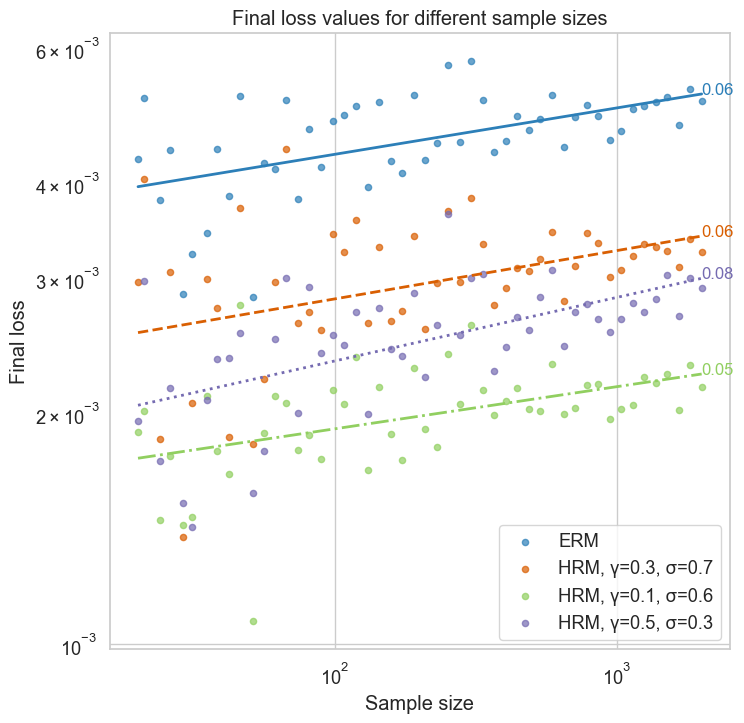

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = [8, 8]
np.random.seed(42)

def simulate_results(sample_sizes, feature_sizes, gamma_sigma_pairs, flags):
    final_losses_sample_size = []

    for n_samples in sample_sizes:
        for n_features in feature_sizes:
            X, Y = generate_linear_regression_dataset(n_samples, n_features, noise_std)

            for flag in flags:
                if flag == 0:
                    theta_optimized, loss_history = optimize_theta(X, Y, learning_rate, n_iterations, flag)
                    final_losses_sample_size.append((n_samples, loss_history[-1], flag))
                else:
                    for gamma, sigma in gamma_sigma_pairs:
                        theta_optimized, loss_history = optimize_theta(X, Y, learning_rate, n_iterations, flag, gamma, sigma)
                        final_losses_sample_size.append((n_samples, loss_history[-1], flag, gamma, sigma))

    return final_losses_sample_size

def plot_results(final_losses_sample_size, sample_sizes):
    colors = ['#2c7fb8', '#d95f02', '#91cf60', '#756bb1', '#e31a1c']
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    labels_added = set()
    line_data = {color: [] for color in colors}

    for loss_info in final_losses_sample_size:
        label = "ERM" if loss_info[2] == 0 else "HRM"
        if len(loss_info) > 3:
            label += f", γ={loss_info[3]}, σ={loss_info[4]}"
            color_index = gamma_sigma_pairs.index((loss_info[3], loss_info[4])) + 1
        else:
            color_index = 0

        if label not in labels_added:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], label=label, s=20, alpha=0.7)
            labels_added.add(label)
        else:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], s=20, alpha=0.7)

        line_data[colors[color_index]].append((loss_info[0], loss_info[1]))

    for color, data_points in line_data.items():
        if data_points:
            x_vals, y_vals = zip(*data_points)
            line_coefficients = np.polyfit(np.log(x_vals), np.log(y_vals), 1)
            line_function = np.poly1d(line_coefficients)
            linestyle = linestyles[colors.index(color)]
            plt.plot(sample_sizes, np.exp(line_function(np.log(sample_sizes))), c=color, linestyle=linestyle, linewidth=2)
            plt.text(sample_sizes[-1], np.exp(line_function(np.log(sample_sizes[-1]))), f"{line_coefficients[0]:.2f}", color=color, fontsize=12)

    plt.xscale("log")
    plt.yscale("log")
    plt.title("Final loss values for different sample sizes")
    plt.xlabel("Sample size")
    plt.ylabel("Final loss")
    plt.legend()
    plt.show()


# Parameters for simulations
sample_sizes = np.logspace(np.log10(20), np.log10(2000), num=50).astype(int)
feature_sizes = [5]
gamma_sigma_pairs = [(0.3, 0.7), (0.1, 0.6), (0.5, 0.3)]
flags = [0, 1]

final_losses_sample_size = simulate_results(sample_sizes, feature_sizes, gamma_sigma_pairs, flags)
plot_results(final_losses_sample_size, sample_sizes)


In [2]:
def simulate_results_varying_features(sample_sizes, feature_sizes, gamma_sigma_pairs, flags):
    final_losses_feature_size = []

    for n_samples in sample_sizes:
        for n_features in feature_sizes:
            X, Y = generate_linear_regression_dataset(n_samples, n_features, noise_std)

            for flag in flags:
                if flag == 0:
                    theta_optimized, loss_history = optimize_theta(X, Y, learning_rate, n_iterations, flag)
                    final_losses_feature_size.append((n_features, loss_history[-1], flag))
                else:
                    for gamma, sigma in gamma_sigma_pairs:
                        theta_optimized, loss_history = optimize_theta(X, Y, learning_rate, n_iterations, flag, gamma, sigma)
                        final_losses_feature_size.append((n_features, loss_history[-1], flag, gamma, sigma))

    return final_losses_feature_size

def plot_results_varying_features(final_losses_feature_size, feature_sizes):
    colors = ['#2c7fb8', '#d95f02', '#91cf60', '#756bb1', '#e31a1c']
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    labels_added = set()
    line_data = {color: [] for color in colors}

    for loss_info in final_losses_feature_size:
        label = "ERM" if loss_info[2] == 0 else "HRM"
        if len(loss_info) > 3:
            label += f", γ={loss_info[3]}, σ={loss_info[4]}"
            color_index = gamma_sigma_pairs.index((loss_info[3], loss_info[4])) + 1
        else:
            color_index = 0

        if label not in labels_added:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], label=label, s=20, alpha=0.7)
            labels_added.add(label)
        else:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], s=20, alpha=0.7)

        line_data[colors[color_index]].append((loss_info[0], loss_info[1]))

    for color, data_points in line_data.items():
        if data_points:
            x_vals, y_vals = zip(*data_points)
            line_coefficients = np.polyfit(np.log(x_vals), np.log(y_vals), 1)
            line_function = np.poly1d(line_coefficients)
            linestyle = linestyles[colors.index(color)]
            plt.plot(feature_sizes, np.exp(line_function(np.log(feature_sizes))), c=color, linestyle=linestyle, linewidth=2)
            plt.text(feature_sizes[-1], np.exp(line_function(np.log(feature_sizes[-1]))), f"{line_coefficients[0]:.2f}", color=color, fontsize=12)

    plt.xscale("log")
    plt.yscale("log")
    plt.title("Final loss values for different sample sizes")
    plt.xlabel("Sample size")
    plt.ylabel("Final loss")
    plt.legend()
    plt.show()


# Parameters for simulations
sample_sizes = [1000]
feature_sizes = np.linspace(5, 50, num=20).astype(int)
gamma_sigma_pairs = [(0.3, 0.7), (0.1, 0.6), (0.5, 0.3)]
flags = [0, 1]

final_losses_feature_size = simulate_results_varying_features(sample_sizes, feature_sizes, gamma_sigma_pairs, flags)
plot_results_varying_features(final_losses_feature_size, feature_sizes)


NameError: name 'np' is not defined

/var/folders/54/fqxz3t3n5jl96tnjjs6gqf7w0000gp/T/ipykernel_3032/2648569024.py:62: RuntimeWarning: invalid value encountered in log
  line_coefficients = np.polyfit(np.log(x_vals), np.log(y_vals), 1)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


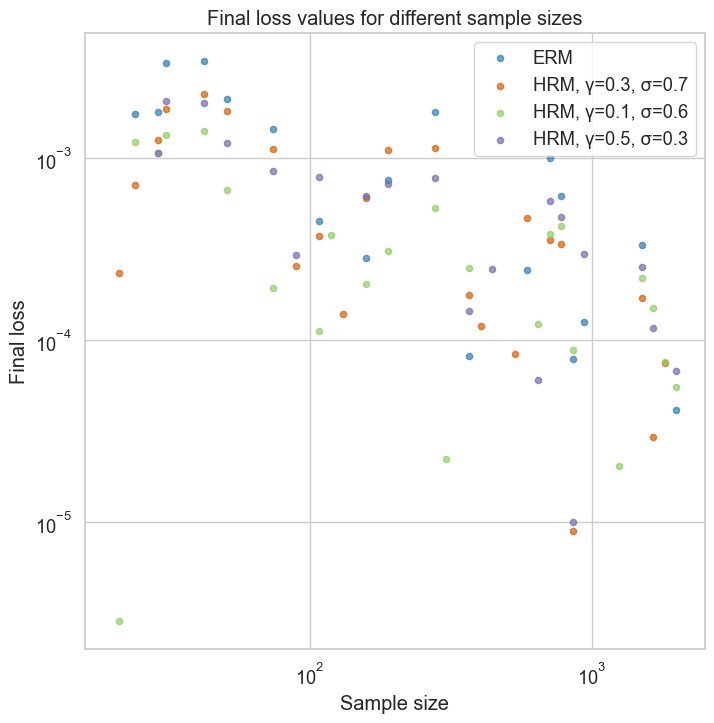

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = [8, 8]
np.random.seed(42)

def simulate_results(sample_sizes, feature_sizes, gamma_sigma_pairs, flags):
    final_losses_sample_size = []

    for n_samples in sample_sizes:
        for n_features in feature_sizes:
            X, Y = generate_linear_regression_dataset(n_samples, n_features, noise_std)

            # Split the dataset into training and testing sets
            train_ratio = 0.8
            train_size = int(n_samples * train_ratio)
            X_train, X_test = X[:train_size], X[train_size:]
            Y_train, Y_test = Y[:train_size], Y[train_size:]

            for flag in flags:
                if flag == 0:
                    theta_optimized, _ = optimize_theta(X_train, Y_train, learning_rate, n_iterations, flag)
                    train_loss = ERM_loss(theta_optimized, X_train, Y_train)
                    test_loss = ERM_loss(theta_optimized, X_test, Y_test)
                    final_losses_sample_size.append((n_samples, train_loss - test_loss, flag))
                else:
                    for gamma, sigma in gamma_sigma_pairs:
                        theta_optimized, _ = optimize_theta(X_train, Y_train, learning_rate, n_iterations, flag, gamma, sigma)
                        train_loss = HRM_loss(theta_optimized, X_train, Y_train, gamma, sigma)
                        test_loss = HRM_loss(theta_optimized, X_test, Y_test, gamma, sigma)
                        final_losses_sample_size.append((n_samples, train_loss - test_loss, flag, gamma, sigma))

    return final_losses_sample_size

def plot_results(final_losses_sample_size, sample_sizes):
    colors = ['#2c7fb8', '#d95f02', '#91cf60', '#756bb1', '#e31a1c']
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    labels_added = set()
    line_data = {color: [] for color in colors}

    for loss_info in final_losses_sample_size:
        label = "ERM" if loss_info[2] == 0 else "HRM"
        if len(loss_info) > 3:
            label += f", γ={loss_info[3]}, σ={loss_info[4]}"
            color_index = gamma_sigma_pairs.index((loss_info[3], loss_info[4])) + 1
        else:
            color_index = 0

        if label not in labels_added:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], label=label, s=20, alpha=0.7)
            labels_added.add(label)
        else:
            plt.scatter(loss_info[0], loss_info[1], c=colors[color_index], s=20, alpha=0.7)

        line_data[colors[color_index]].append((loss_info[0], loss_info[1]))

    for color, data_points in line_data.items():
        if data_points:
            x_vals, y_vals = zip(*data_points)
            line_coefficients = np.polyfit(np.log(x_vals), np.log(y_vals), 1)
            line_function = np.poly1d(line_coefficients)
            linestyle = linestyles[colors.index(color)]
            plt.plot(sample_sizes, np.exp(line_function(np.log(sample_sizes))), c=color, linestyle=linestyle, linewidth=2)
            plt.text(sample_sizes[-1], np.exp(line_function(np.log(sample_sizes[-1]))), f"{line_coefficients[0]:.2f}", color=color, fontsize=12)

    plt.xscale("log")
    plt.yscale("log")
    plt.title("Final loss values for different sample sizes")
    plt.xlabel("Sample size")
    plt.ylabel("Final loss")
    plt.legend()
    plt.show()


# Parameters for simulations
sample_sizes = np.logspace(np.log10(20), np.log10(2000), num=50).astype(int)
feature_sizes = [5]
gamma_sigma_pairs = [(0.3, 0.7), (0.1, 0.6), (0.5, 0.3)]
flags = [0, 1]

final_losses_sample_size = simulate_results(sample_sizes, feature_sizes, gamma_sigma_pairs, flags)
plot_results(final_losses_sample_size, sample_sizes)
